Simon's Young Moving Group (YMG): TWA, OCT, PL8, CBER, TAU, 118TAU

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec
"""
#1st HR data
sample_HR= "/content/drive/MyDrive/Research/Young Stars/AY9_workday_dataset.csv"
hr_data = np.genfromtxt(sample_HR, names='absolute_Gmag,BP_minus_RP', delimiter=",") #after last parameter, add delimiter = ","
"""

#2nd HR data
sample_HR_2 = "/content/drive/MyDrive/Research/Young Stars/Gaia_field_stars.csv"
hr_data_2 = np.genfromtxt(sample_HR_2, names='parallax,apparent_Gmag,BP_mag, RP_mag', delimiter=",")

#my dataset
YMG_compilation= "/content/drive/MyDrive/Research/Young Stars/srssDR3finalno.xyz.uvw.csv"
ymg_data = np.genfromtxt(YMG_compilation, names='ymg,ra,dec,parallax,pm,pmRA,pmDEC,Gmag,BPmag,RPmag,BPminusRP,BPminusG,GminusRP,radial_velocity,x,y,z,u,v,w', delimiter=",", skip_header=1) #after last parameter, add delimiter = ","

#candidates
candidates_file = "/content/drive/MyDrive/Research/Young Stars/candidatespropertiesfinal - candidatesproperties.csv"
candidates = np.genfromtxt(candidates_file, names='names,ra,dec,parallax,pm,pmra,pmdec,gmag,bpmag,rpmag,BPminusRP,BPminusG,GminusRP,rv,x,y,z,u,v,w',delimiter=",")


# `Kinematics`

In [156]:
#candidates
ra_candidates = candidates["ra"]
dec_candidates = candidates["dec"]
x_candidates = candidates["x"]
y_candidates = candidates["y"]
z_candidates = candidates["z"]
u_candidates = candidates["u"]
v_candidates = candidates["v"]
w_candidates = candidates["w"]

In [157]:
#[0, -1],..[+2, -1]..,[+2,0]
ra = ymg_data["ra"]
dec = ymg_data["dec"]
x = ymg_data["x"]
y = ymg_data["y"]
z = ymg_data["z"]
u = ymg_data["u"]
v = ymg_data["v"]
w = ymg_data["w"]

#TWA 0:26
#RA, DEC, xyz,uvw
ra_TWA = ra[0:26]
dec_TWA = dec[0:26]
x_TWA = x[0:26]
y_TWA = y[0:26]
z_TWA = z[0:26]
u_TWA = u[0:26]
v_TWA = v[0:26]
w_TWA = w[0:26]

#CBER 26:66
z_CBER_unfiltered = z[26:66]
z_CBER_indices_array = np.where(z_CBER_unfiltered < 100)
z_CBER = z_CBER_unfiltered[z_CBER_indices_array]

x_CBER_unfiltered = x[26:66]
x_CBER = x_CBER_unfiltered[z_CBER_indices_array]

y_CBER_unfiltered = y[26:66]
y_CBER = y_CBER_unfiltered[z_CBER_indices_array]

u_CBER_unfiltered = u[26:66]
u_CBER = u_CBER_unfiltered[z_CBER_indices_array]

v_CBER_unfiltered = v[26:66]
v_CBER = v_CBER_unfiltered[z_CBER_indices_array]

w_CBER_unfiltered = w[26:66]
w_CBER = w_CBER_unfiltered[z_CBER_indices_array]

ra_CBER_unfiltered = ra[26:66]
ra_CBER = ra_CBER_unfiltered[z_CBER_indices_array]

dec_CBER_unfiltered = dec[26:66]
dec_CBER = dec_CBER_unfiltered[z_CBER_indices_array]

#118TAU 66:76
ra_118TAU = ra[66:76]
dec_118TAU = dec[66:76]
x_118TAU = x[66:76]
y_118TAU = y[66:76]
z_118TAU = z[66:76]
u_118TAU = u[66:76]
v_118TAU = v[66:76]
w_118TAU = w[66:76]

#OCT 76:87
ra_OCT = ra[76:87]
dec_OCT = dec[76:87]
x_OCT = x[76:87]
y_OCT = y[76:87]
z_OCT = z[76:87]
u_OCT = u[76:87]
v_OCT = v[76:87]
w_OCT = w[76:87]

#TAU 87:201
#use np.where for TAU because some values of x are very large, messing up the whole std scale
x_TAU_unfiltered = x[87:201]
x_TAU_indices_array = np.where(x_TAU_unfiltered > -1000)
x_TAU = x_TAU_unfiltered[x_TAU_indices_array]

y_TAU_unfiltered = y[87:201]
y_TAU = y_TAU_unfiltered[x_TAU_indices_array]

z_TAU_unfiltered = z[87:201]
z_TAU = z_TAU_unfiltered[x_TAU_indices_array]

u_TAU_unfiltered = u[87:201]
u_TAU = u_TAU_unfiltered[x_TAU_indices_array]

v_TAU_unfiltered = v[87:201]
v_TAU = v_TAU_unfiltered[x_TAU_indices_array]

w_TAU_unfiltered = w[87:201]
w_TAU = w_TAU_unfiltered[x_TAU_indices_array]

ra_TAU_unfiltered = ra[87:201]
ra_TAU = ra_TAU_unfiltered[x_TAU_indices_array]

dec_TAU_unfiltered = dec[87:201]
dec_TAU = dec_TAU_unfiltered[x_TAU_indices_array]

#PL8 201:211
ra_PL8 = ra[201:211]
dec_PL8 = dec[201:211]
x_PL8 = x[201:211]
y_PL8 = y[201:211]
z_PL8 = z[201:211]
u_PL8 = u[201:211]
v_PL8 = v[201:211]
v_UCL = v[211:308]
w_PL8 = w[201:211]

#UCL 211:308
ra_UCL = ra[211:308]
dec_UCL = dec[211:308]
x_UCL = x[211:308]
y_UCL = y[211:308]
z_UCL = z[211:308]
u_UCL = u[211:308]
v_UCL = v[211:308]
w_UCL = w[211:308]

In [158]:
#graphing
def plot_six_kinematics_all_candidates(x,y,z,u,v,w,name):
  #std-start
  #the mean will be the point in the middle, add by 3*sigma to get the rightside
  #subtract 3*sigma to get the leftside
  rightx1 = np.nanmean(x) + np.nanstd(x)
  righty1 = np.nanmean(y) + np.nanstd(y)
  rightz1 = np.nanmean(z) + np.nanstd(z)
  rightu1 = np.nanmean(u) + np.nanstd(u)
  rightv1 = np.nanmean(v) + np.nanstd(v)
  rightw1 = np.nanmean(w) + np.nanstd(w)

  rightx2 = np.nanmean(x) + 2*np.nanstd(x)
  righty2 = np.nanmean(y) + 2*np.nanstd(y)
  rightz2 = np.nanmean(z) + 2*np.nanstd(z)
  rightu2 = np.nanmean(u) + 2*np.nanstd(u)
  rightv2 = np.nanmean(v) + 2*np.nanstd(v)
  rightw2 = np.nanmean(w) + 2*np.nanstd(w)

  rightx3 = np.nanmean(x) + 3*np.nanstd(x)
  righty3 = np.nanmean(y) + 3*np.nanstd(y)
  rightz3 = np.nanmean(z) + 3*np.nanstd(z)
  rightu3 = np.nanmean(u) + 3*np.nanstd(u)
  rightv3 = np.nanmean(v) + 3*np.nanstd(v)
  rightw3 = np.nanmean(w) + 3*np.nanstd(w)

  leftx1 = np.nanmean(x) - np.nanstd(x)
  lefty1 = np.nanmean(y) - np.nanstd(y)
  leftz1 = np.nanmean(z) - np.nanstd(z)
  leftu1 = np.nanmean(u) - np.nanstd(u)
  leftv1 = np.nanmean(v) - np.nanstd(v)
  leftw1 = np.nanmean(w) - np.nanstd(w)

  leftx2 = np.nanmean(x) - 2*np.nanstd(x)
  lefty2 = np.nanmean(y) - 2*np.nanstd(y)
  leftz2 = np.nanmean(z) - 2*np.nanstd(z)
  leftu2 = np.nanmean(u) - 2*np.nanstd(u)
  leftv2 = np.nanmean(v) - 2*np.nanstd(v)
  leftw2 = np.nanmean(w) - 2*np.nanstd(w)

  leftx3 = np.nanmean(x) - 3*np.nanstd(x)
  lefty3 = np.nanmean(y) - 3*np.nanstd(y)
  leftz3 = np.nanmean(z) - 3*np.nanstd(z)
  leftu3 = np.nanmean(u) - 3*np.nanstd(u)
  leftv3 = np.nanmean(v) - 3*np.nanstd(v)
  leftw3 = np.nanmean(w) - 3*np.nanstd(w)

  rect_coords_xy1 = (leftx1,lefty1)
  rect_coords_xz1 = (leftx1,leftz1)
  rect_coords_yz1 = (lefty1,leftz1)
  rect_coords_uv1 = (leftu1,leftv1)
  rect_coords_uw1 = (leftu1,leftw1)
  rect_coords_vw1 = (leftv1,leftw1)

  rect_coords_xy2 = (leftx2,lefty2)
  rect_coords_xz2 = (leftx2,leftz2)
  rect_coords_yz2 = (lefty2,leftz2)
  rect_coords_uv2 = (leftu2,leftv2)
  rect_coords_uw2 = (leftu2,leftw2)
  rect_coords_vw2 = (leftv2,leftw2)

  rect_coords_xy3 = (leftx3,lefty3)
  rect_coords_xz3 = (leftx3,leftz3)
  rect_coords_yz3 = (lefty3,leftz3)
  rect_coords_uv3 = (leftu3,leftv3)
  rect_coords_uw3 = (leftu3,leftw3)
  rect_coords_vw3 = (leftv3,leftw3)

  #times 2 for the length of the rectangle itself from the left bottom point
  #this length is equivalent to the absolute value of |rightx3-leftx3|
  rect_len_x1 = 2*np.nanstd(x)
  rect_len_y1 = 2*np.nanstd(y)
  rect_len_z1 = 2*np.nanstd(z)
  rect_len_u1 = 2*np.nanstd(u)
  rect_len_v1 = 2*np.nanstd(v)
  rect_len_w1 = 2*np.nanstd(w)

  rect_len_x2 = 2*2*np.nanstd(x)
  rect_len_y2 = 2*2*np.nanstd(y)
  rect_len_z2 = 2*2*np.nanstd(z)
  rect_len_u2 = 2*2*np.nanstd(u)
  rect_len_v2 = 2*2*np.nanstd(v)
  rect_len_w2 = 2*2*np.nanstd(w)

  rect_len_x3 = 2*3*np.nanstd(x)
  rect_len_y3 = 2*3*np.nanstd(y)
  rect_len_z3 = 2*3*np.nanstd(z)
  rect_len_u3 = 2*3*np.nanstd(u)
  rect_len_v3 = 2*3*np.nanstd(v)
  rect_len_w3 = 2*3*np.nanstd(w)

  rectangle_xy1 = plt.Rectangle(rect_coords_xy1,rect_len_x1,rect_len_y1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)
  rectangle_xz1 = plt.Rectangle(rect_coords_xz1,rect_len_x1,rect_len_z1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)
  rectangle_yz1 = plt.Rectangle(rect_coords_yz1,rect_len_y1,rect_len_z1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)
  rectangle_uv1 = plt.Rectangle(rect_coords_uv1,rect_len_u1,rect_len_v1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)
  rectangle_uw1 = plt.Rectangle(rect_coords_uw1,rect_len_u1,rect_len_w1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)
  rectangle_vw1 = plt.Rectangle(rect_coords_vw1,rect_len_v1,rect_len_w1,linewidth=1.25,edgecolor="#990000",facecolor='none',linestyle = '--',alpha = .5)

  rectangle_xy2 = plt.Rectangle(rect_coords_xy2,rect_len_x2,rect_len_y2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)
  rectangle_xz2 = plt.Rectangle(rect_coords_xz2,rect_len_x2,rect_len_z2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)
  rectangle_yz2 = plt.Rectangle(rect_coords_yz2,rect_len_y2,rect_len_z2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)
  rectangle_uv2 = plt.Rectangle(rect_coords_uv2,rect_len_u2,rect_len_v2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)
  rectangle_uw2 = plt.Rectangle(rect_coords_uw2,rect_len_u2,rect_len_w2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)
  rectangle_vw2 = plt.Rectangle(rect_coords_vw2,rect_len_v2,rect_len_w2,linewidth=1.5,edgecolor="#ca7e2d",facecolor='none',linestyle = '--',alpha = .75)

  rectangle_xy3 = plt.Rectangle(rect_coords_xy3,rect_len_x3,rect_len_y3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')
  rectangle_xz3 = plt.Rectangle(rect_coords_xz3,rect_len_x3,rect_len_z3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')
  rectangle_yz3 = plt.Rectangle(rect_coords_yz3,rect_len_y3,rect_len_z3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')
  rectangle_uv3 = plt.Rectangle(rect_coords_uv3,rect_len_u3,rect_len_v3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')
  rectangle_uw3 = plt.Rectangle(rect_coords_uw3,rect_len_u3,rect_len_w3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')
  rectangle_vw3 = plt.Rectangle(rect_coords_vw3,rect_len_v3,rect_len_w3,linewidth=1.75,edgecolor="#f7cf58",facecolor='none')

  #use the std to find candidates using np.where
  #np.where returns True to all the indices for the conditions that are true
  #set the resulting array to a new set of array to get the values
  candidates_indices = np.where(
      ((x_candidates>leftx3)&(x_candidates<rightx3))&((y_candidates>lefty3)&(y_candidates<righty3))&((z_candidates>leftz3)&(z_candidates<rightz3))
     &((u_candidates>leftu3)&(u_candidates<rightu3))&((v_candidates>leftv3)&(v_candidates<rightv3))&((w_candidates>leftw3)&(w_candidates<rightw3))
     )

  x_confirmed_candidates = x_candidates[candidates_indices]
  y_confirmed_candidates = y_candidates[candidates_indices]
  z_confirmed_candidates = z_candidates[candidates_indices]
  u_confirmed_candidates = u_candidates[candidates_indices]
  v_confirmed_candidates = v_candidates[candidates_indices]
  w_confirmed_candidates = w_candidates[candidates_indices]

  #number of confirmed candidates
  num_cc = len(x_confirmed_candidates)

  #std-end, begin plotting
  fig = plt.figure(figsize=(20,8))
  title = "Group Name & Age: " + name + "\n" + "Number of Confirmed Candidates: " + str(num_cc)
  fig.suptitle(title, fontsize=20,fontweight="heavy",y=1.0)
  gs = gridspec.GridSpec(2,3)

  """START: template of graphs explained"""
  #grid box top left
  ax1 = fig.add_subplot(gs[0,0])

  #grid background color
  ax1.set_facecolor("#0C0C0C")

  #labels
  ax1.set_xlabel("X (pc)",fontweight="heavy")
  ax1.set_ylabel("Y (pc)",fontweight="heavy")

  #x,y axis limiters
  plt.xlim(lim_min(leftx3,x,3),lim_max(rightx3,x,3))
  plt.ylim(lim_min(lefty3,y,3),lim_max(righty3,y,3))

  #candidates
  ax1c = ax1.scatter(x_candidates,y_candidates, s=4,c="#c0bfbd",alpha=.5)

  #rectangle
  rectxy3 = plt.gca().add_patch(rectangle_xy3)

  #members
  ax1m = ax1.scatter(x,y, s=100,c="#4b86ae", marker='*', edgecolors='#004779')

  rectxy1 = plt.gca().add_patch(rectangle_xy1)
  rectxy2 = plt.gca().add_patch(rectangle_xy2)

  #confirmed candidates
  ax1cc = ax1.scatter(x_confirmed_candidates,y_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

  #legends
  legend = ax1.legend(handles = [rectxy1,rectxy2,rectxy3,ax1c,ax1cc,ax1m], labels=['Sigma 1','Sigma 2','Sigma 3','Candidates','Confirmed Candidates','Members'],bbox_to_anchor = (4,1), facecolor = "black")
  for text in legend.get_texts():
    text.set_color('white')
  """END: template of graphs explained"""

  #xz
  ax2 = fig.add_subplot(gs[0,1])
  ax2.set_facecolor("#0C0C0C")
  ax2.set_xlabel("X (pc)",fontweight="heavy")
  ax2.set_ylabel("Z (pc)",fontweight="heavy")
  plt.xlim(lim_min(leftx3,x,3),lim_max(rightx3,x,3))
  plt.ylim(lim_min(leftz3,z,3),lim_max(rightz3,z,3))
  ax2.scatter(x_candidates,z_candidates, s=4,c="#c0bfbd",alpha=.5)
  plt.gca().add_patch(rectangle_xz3)
  ax2.scatter(x,z, s=100,c="#4b86ae",marker='*', edgecolors='#004779')
  plt.gca().add_patch(rectangle_xz1)
  plt.gca().add_patch(rectangle_xz2)
  ax2.scatter(x_confirmed_candidates,z_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

  #yz
  ax3 = fig.add_subplot(gs[0,2])
  ax3.set_facecolor("#0C0C0C")
  ax3.set_xlabel("Y (pc)",fontweight="heavy")
  ax3.set_ylabel("Z (pc)",fontweight="heavy")
  plt.xlim(lim_min(lefty3,y,3),lim_max(righty3,y,3))
  plt.ylim(lim_min(leftz3,z,3),lim_max(rightz3,z,3))
  ax3.scatter(y_candidates,z_candidates, s=4,c="#c0bfbd",alpha=.5)
  plt.gca().add_patch(rectangle_yz3)
  ax3.scatter(y,z, s=100, c="#4b86ae", marker='*', edgecolors='#004779')
  plt.gca().add_patch(rectangle_yz1)
  plt.gca().add_patch(rectangle_yz2)
  ax3.scatter(y_confirmed_candidates,z_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

  #uv
  ax4 = fig.add_subplot(gs[1,0])
  ax4.set_facecolor("#0C0C0C")
  ax4.set_xlabel("U (km/s)",fontweight="heavy")
  ax4.set_ylabel("V (km/s)",fontweight="heavy")
  plt.xlim(lim_min(leftu3,u,3),lim_max(rightu3,u,3))
  plt.ylim(lim_min(leftv3,v,3),lim_max(rightv3,v,3))
  ax4.scatter(u_candidates,v_candidates, s=4,c="#c0bfbd",alpha=.5)
  plt.gca().add_patch(rectangle_uv3)
  ax4.scatter(u,v, s=100, c="#4b86ae", marker='*', edgecolors='#004779')
  plt.gca().add_patch(rectangle_uv1)
  plt.gca().add_patch(rectangle_uv2)
  ax4.scatter(u_confirmed_candidates,v_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

  #uw
  ax5 = fig.add_subplot(gs[1,1])
  ax5.set_facecolor("#0C0C0C")
  ax5.set_xlabel("U (km/s)",fontweight="heavy")
  ax5.set_ylabel("W (km/s)",fontweight="heavy")
  plt.xlim(lim_min(leftu3,u,3),lim_max(rightu3,u,3))
  plt.ylim(lim_min(leftw3,w,3),lim_max(rightw3,w,3))
  ax5.scatter(u_candidates,w_candidates, s=4,c="#c0bfbd",alpha=.5)
  plt.gca().add_patch(rectangle_uw3)
  ax5.scatter(u,w, s=100, c="#4b86ae", marker='*', edgecolors='#004779')
  plt.gca().add_patch(rectangle_uw1)
  plt.gca().add_patch(rectangle_uw2)
  ax5.scatter(u_confirmed_candidates,w_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

  #vw
  ax6 = fig.add_subplot(gs[1,2])
  ax6.set_facecolor("#0C0C0C")
  ax6.set_xlabel("V (km/s)",fontweight="heavy")
  ax6.set_ylabel("W (km/s)",fontweight="heavy")
  plt.xlim(lim_min(leftv3,v,3),lim_max(rightv3,v,3))
  plt.ylim(lim_min(leftw3,w,3),lim_max(rightw3,w,3))
  ax6.scatter(v_candidates,w_candidates, s=4,c="#c0bfbd",alpha=.5)
  plt.gca().add_patch(rectangle_vw3)
  ax6.scatter(v,w, s=100,c="#4b86ae", marker='*', edgecolors='#004779')
  plt.gca().add_patch(rectangle_vw1)
  plt.gca().add_patch(rectangle_vw2)
  ax6.scatter(v_confirmed_candidates,w_confirmed_candidates, s=200,c="#22cdc5",marker='*', edgecolors='#009c9b')

#plots without candidates without proper scaling
def plot_six_kinematics_noscale(x,y,z,u,v,w):
  fig = plt.figure(figsize=(18,12))
  gs = gridspec.GridSpec(2,3)

  ax1 = fig.add_subplot(gs[0,0])
  ax2 = fig.add_subplot(gs[0,1])
  ax3 = fig.add_subplot(gs[0,2])
  ax4 = fig.add_subplot(gs[1,0])
  ax5 = fig.add_subplot(gs[1,1])
  ax6 = fig.add_subplot(gs[1,2])

  ax1.scatter(x,y, s=4)
  ax2.scatter(x,z, s=4)
  ax3.scatter(y,z, s=4)
  ax4.scatter(u,v, s=4)
  ax5.scatter(u,w, s=4)
  ax6.scatter(v,w, s=4)

#xlim ylim
def lim_max(x,xarray,scale):
  if(np.nanstd(xarray)== 0):
    limax = x+.25
  else:
    limax = x+scale*np.nanstd(xarray)

  return limax

def lim_min(x,xarray,scale):
  if(np.nanstd(xarray)==0):
    limin = x-.25
  else:
    limin = x-scale*np.nanstd(xarray)

  return limin

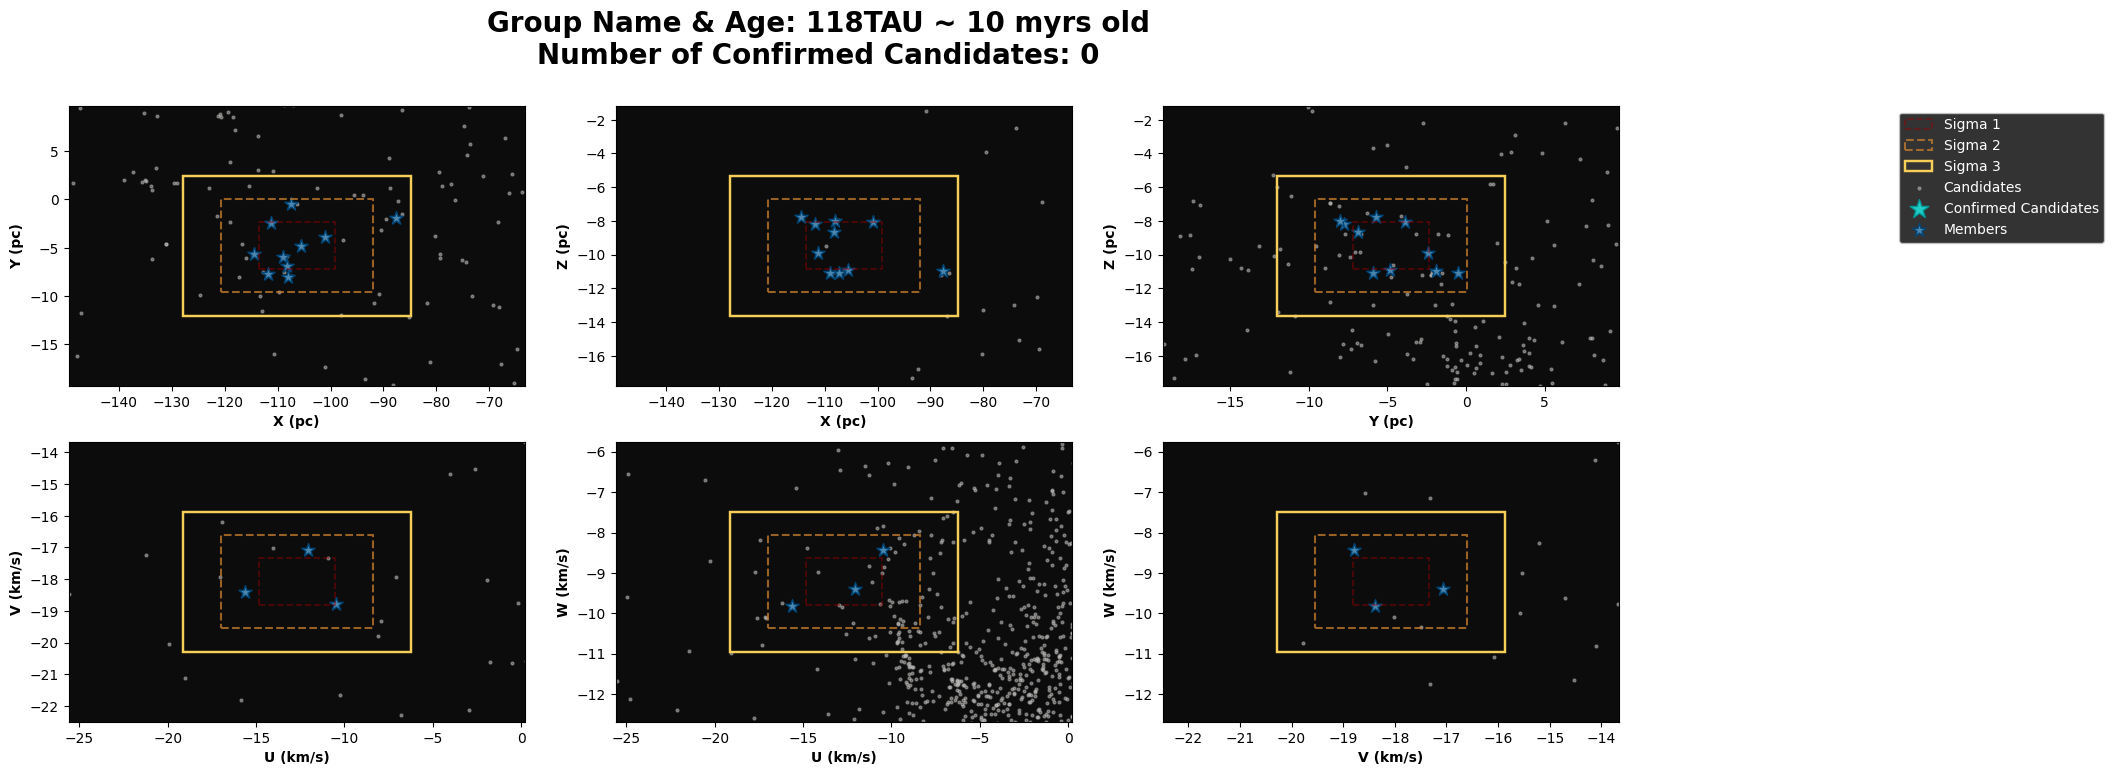

In [159]:
plot_six_kinematics_all_candidates(x_118TAU,y_118TAU,z_118TAU,u_118TAU,v_118TAU,w_118TAU, "118TAU ~ 10 myrs old")

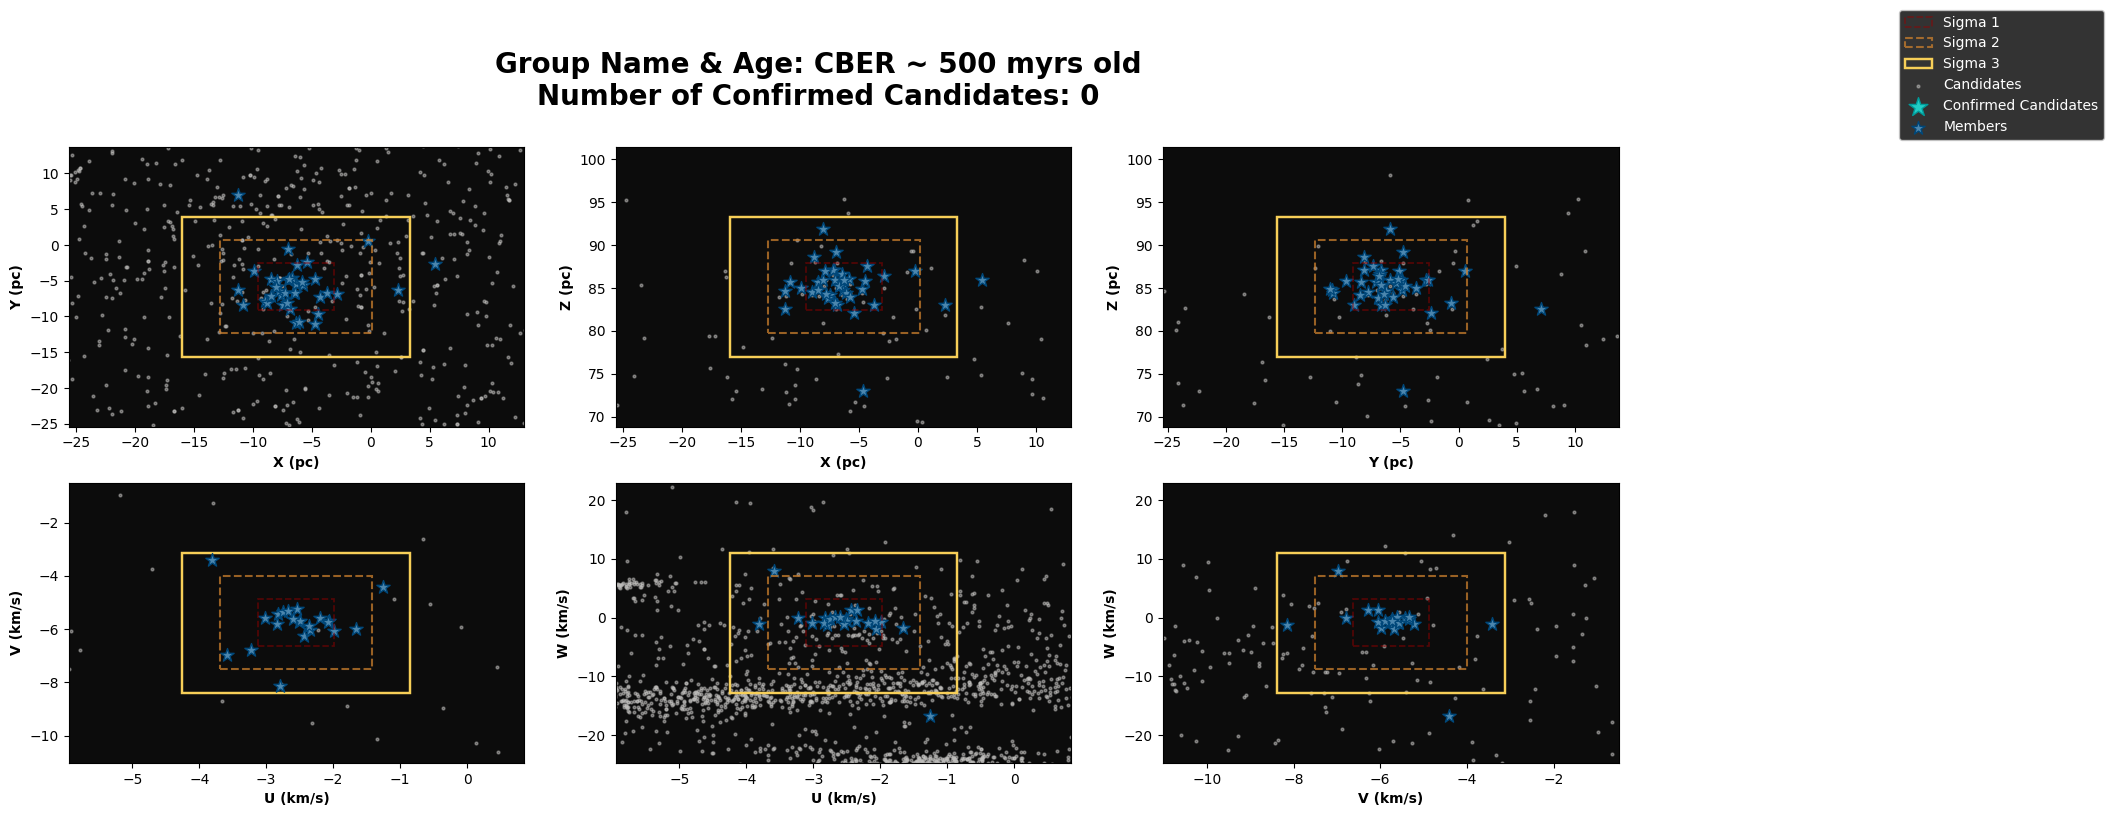

In [160]:
plot_six_kinematics_all_candidates(x_CBER,y_CBER,z_CBER,u_CBER,v_CBER,w_CBER,"CBER ~ 500 myrs old")

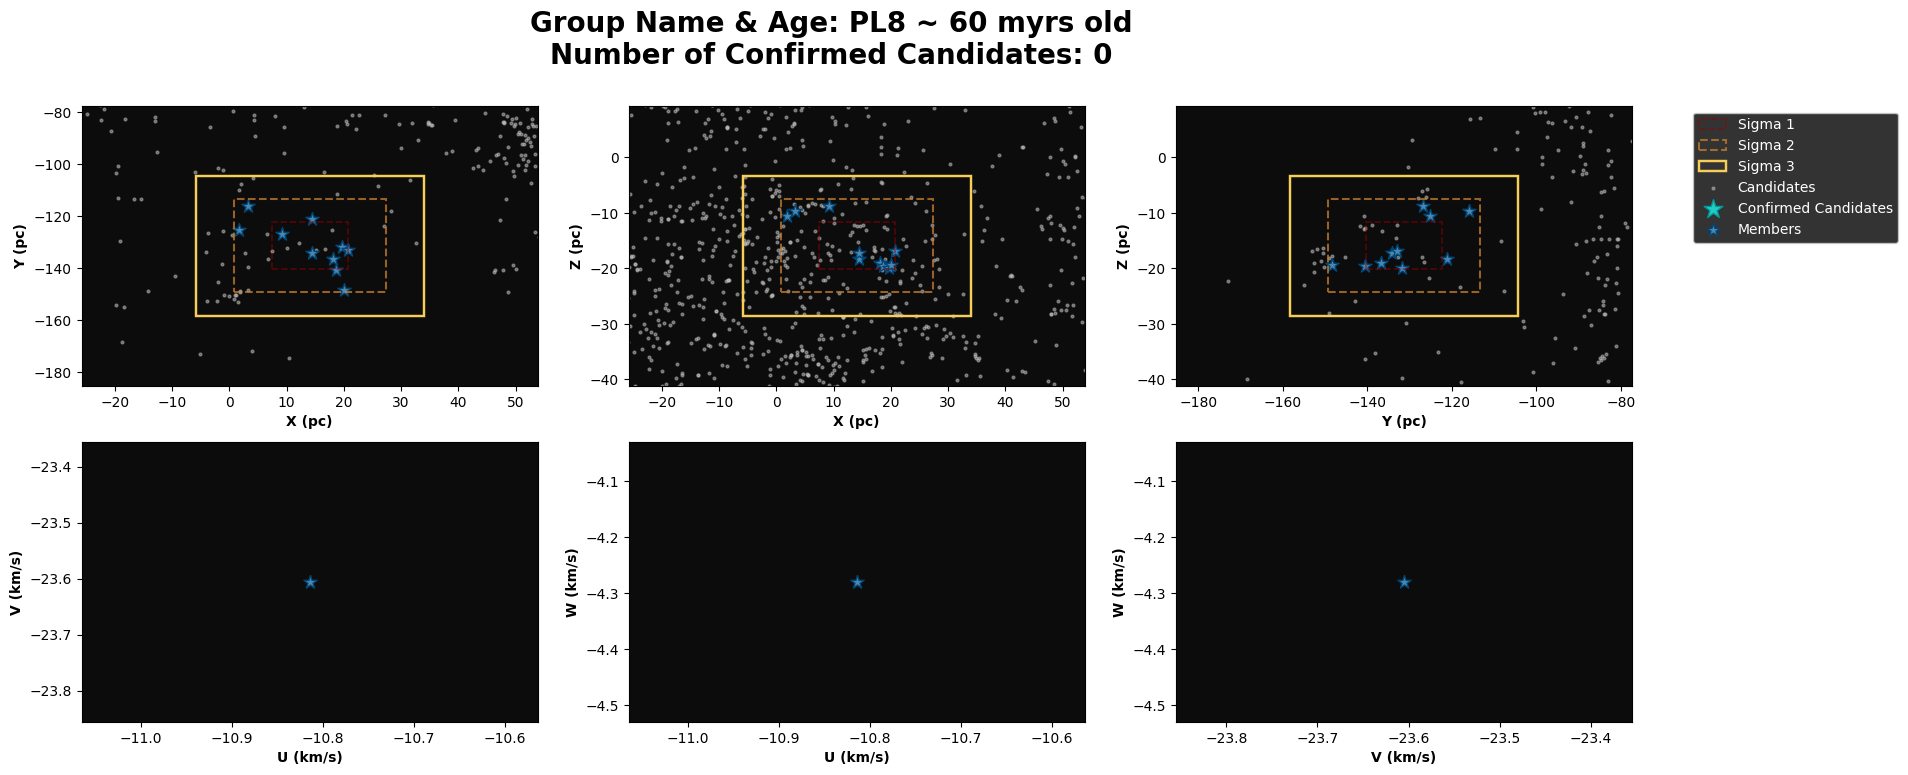

In [161]:
plot_six_kinematics_all_candidates(x_PL8,y_PL8,z_PL8,u_PL8,v_PL8,w_PL8,"PL8 ~ 60 myrs old")

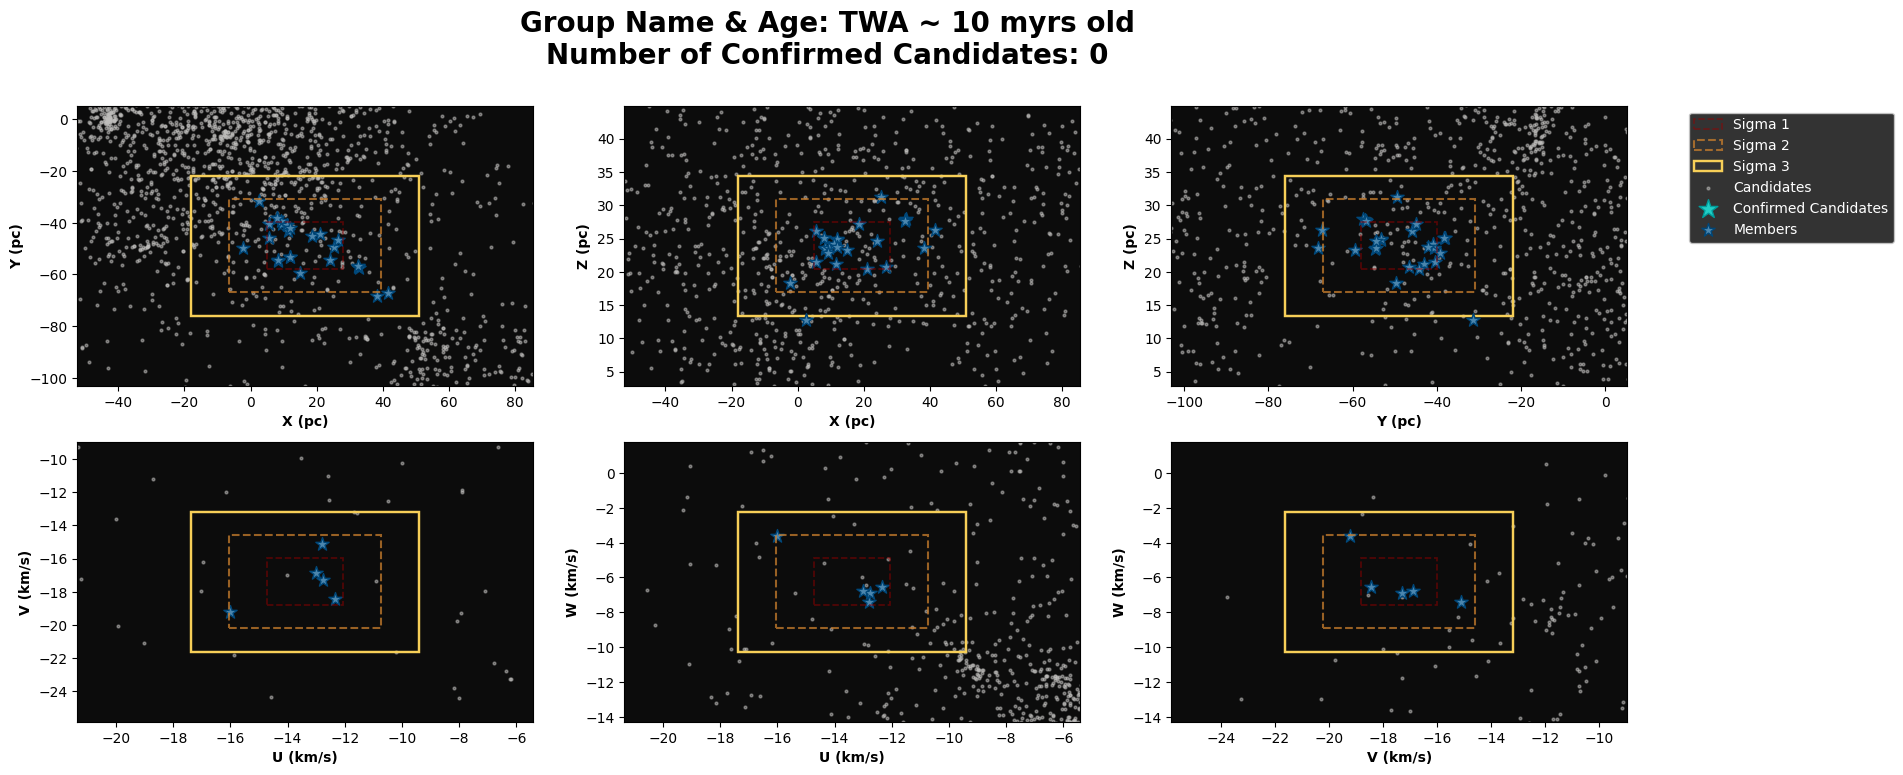

In [162]:
plot_six_kinematics_all_candidates(x_TWA,y_TWA,z_TWA,u_TWA,v_TWA,w_TWA,"TWA ~ 10 myrs old")

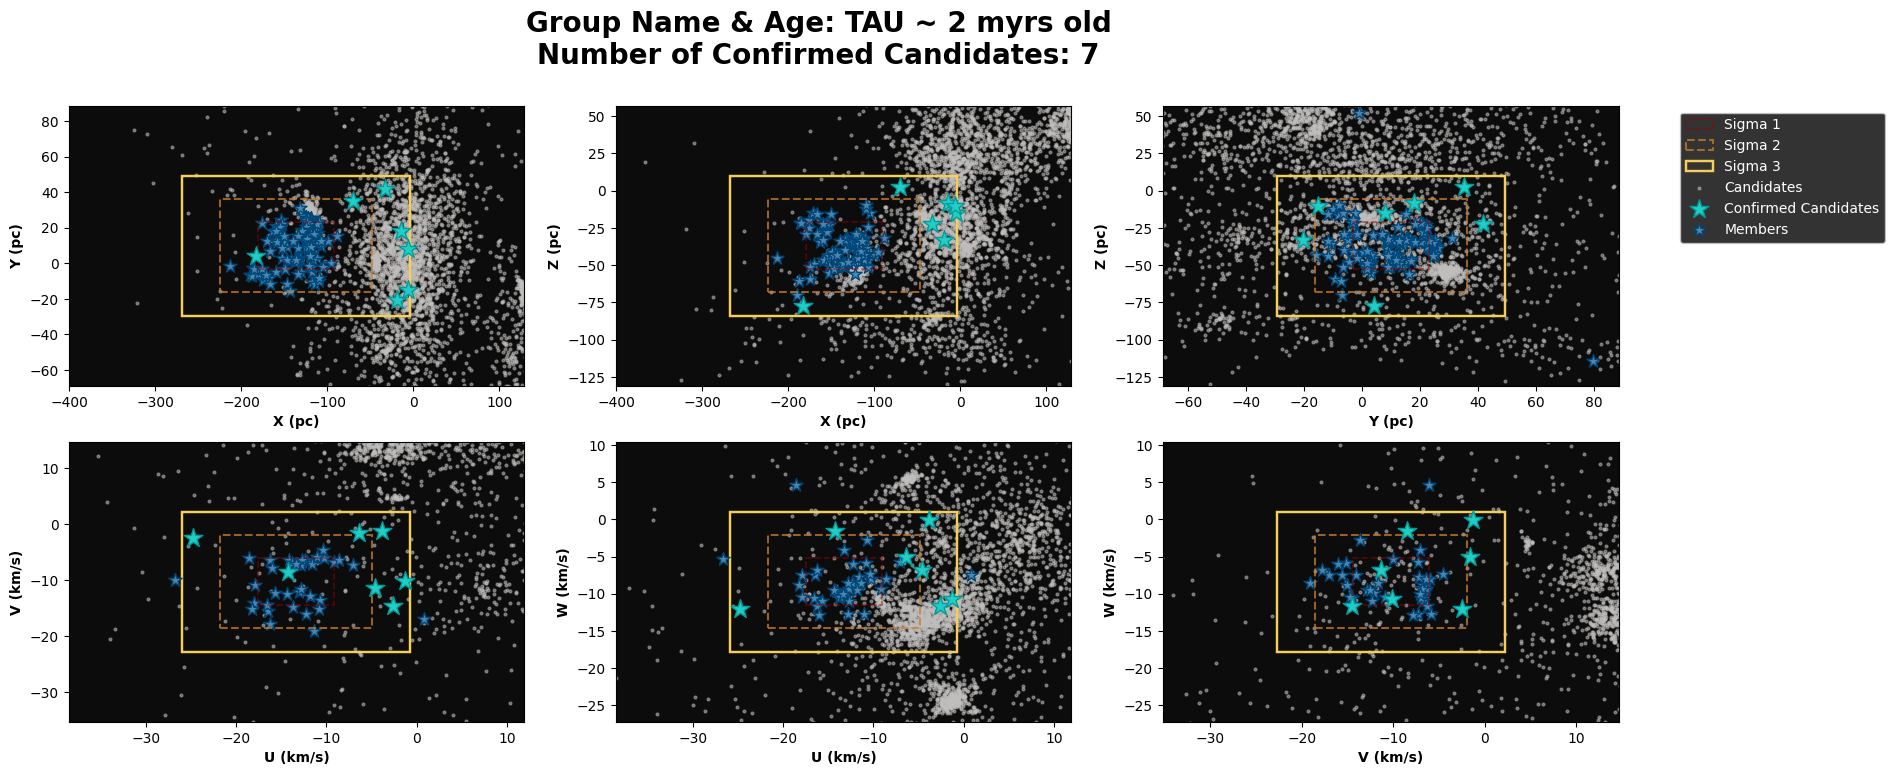

In [163]:
plot_six_kinematics_all_candidates(x_TAU,y_TAU,z_TAU,u_TAU,v_TAU,w_TAU,"TAU ~ 2 myrs old")

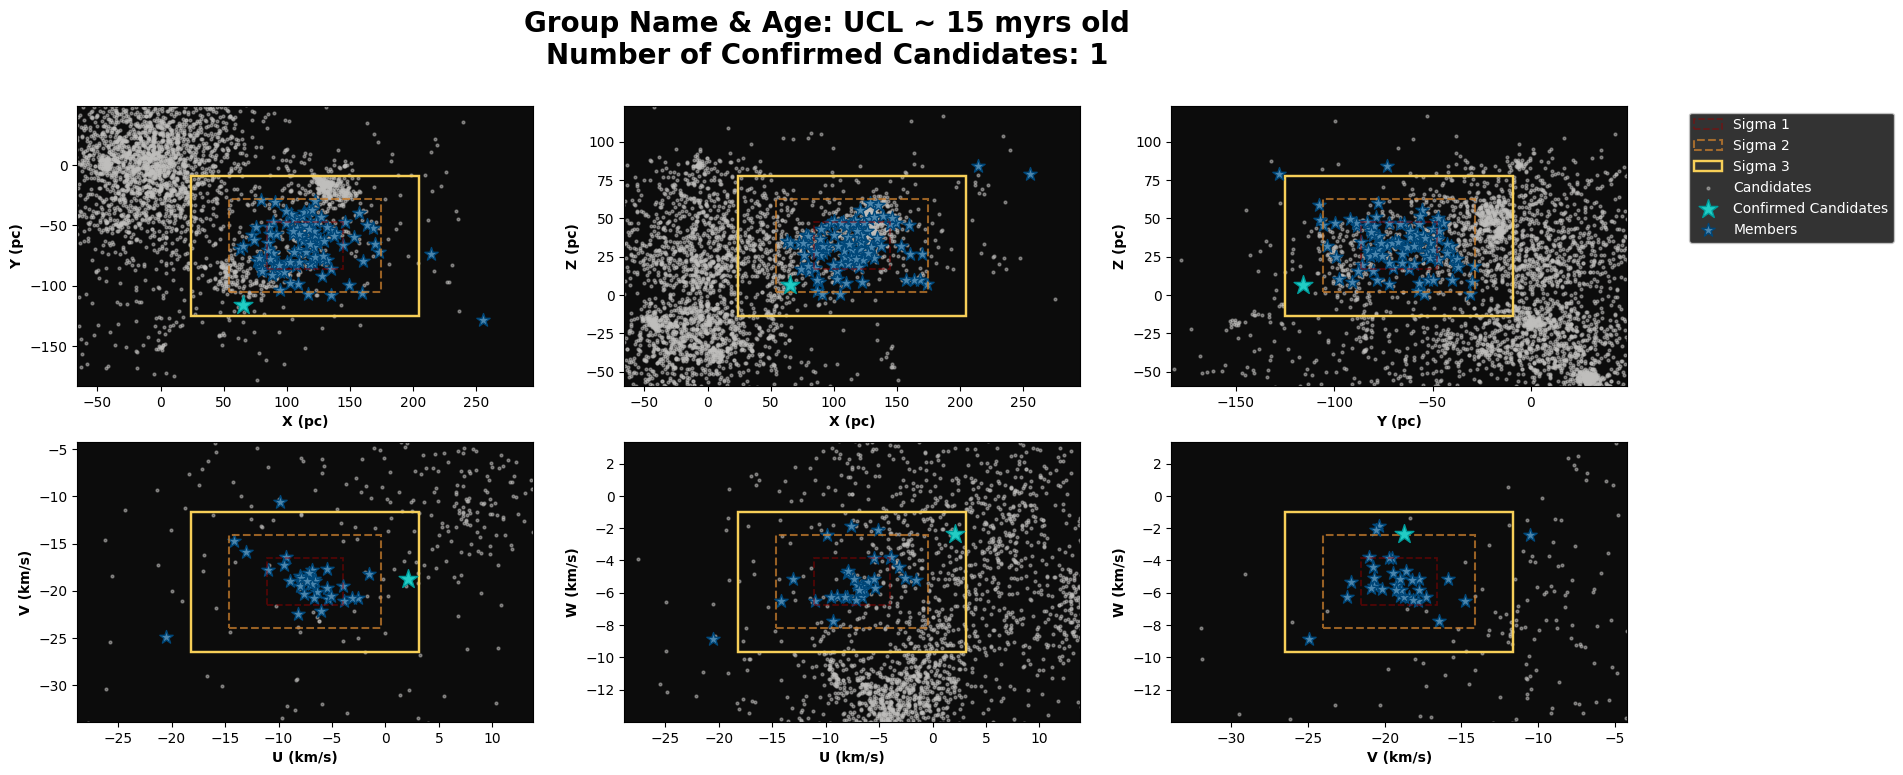

In [164]:
plot_six_kinematics_all_candidates(x_UCL,y_UCL,z_UCL,u_UCL,v_UCL,w_UCL,"UCL ~ 15 myrs old")